# Fuentes de información
### Introducción
En este documento se hablará acerca de las señales senoidales, sus propiedades y modelado de manera interactiva haciendo uso de Python y Jupyter Notebooks. Se profundizara en los conceptos de:
- Periodo
- Frecuencia
- Amplitud
- Fase
- Señales compuestas
- Longitud de onda
- Ancho de banda
- Transformada de Fourier
- Espectro de frecuencia
### Seno
Una señal senoidal es una señal periodica fundamental que es producida por muchos fenómenos naturales en función del tiempo, siendo el tiempo su variable independiente.
Las características de las señales sinoidales son:
- Frecuencia: Número de oscilaciones por unidad de tiempo (generalmente segundos)
- Amplitud: Diferencia entre los máximos y mínimos de la señal.
- Fase: Que tan lejos está recorrida el "inicio" de la señal sinoidal con respecto a un tiempo de referencia.
- Longitud de onda: La longitud de un ciclo de la señal a medida que se propaga en un medio.

El modelo matemático de la señal senoidal en función del tiempo es $A \sin{\omega t+\phi}$ donde

  - $A$: representa la amplitud
  - $\omega$: representa la frecuencia (angular en este caso)
  - $\phi$: representa la fase

En la celda siguiente encontraremos un bloque de código donde podremos interactuar para graficar una señal senoidal.
  - Podemos realizar cambios a la amplitud del seno en la gráfica modificando el paramétro 'amplitud = 1' donde podremos cambiar el número '1' por el número que queramos.
  - Se puede modificar la frecuencia angular (número de oscilaciones) modificando el paramétro 'frecuencia=1' donde podemos cambiar el número 1 por algún otro que queramos.
  - Se puede modificar la fase modificando el paramétro 'fase = 1' donde podemos cambiar el número '1' por algún otro que queramos.
Una vez modificado algún valor en los paramétros podemos 'actualizar' la gráfica haciendo 'click' en el simbolo de 'Ejecutar celda' en el lado izquierdo superior del bloque de código.

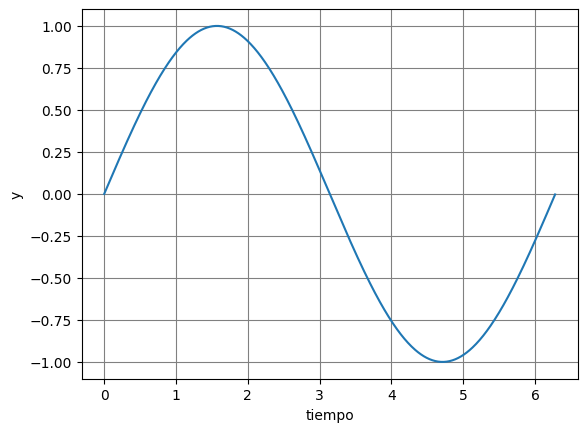

In [24]:
import numpy as np
from math import pi, sin
from modulos.seno import modelo
from modulos.graficar import ploteo
import scipy.signal as signal
import matplotlib.pyplot as plt

amplitud = 1
frecuencia = 1/(2*pi)
fase = 0
x_max = 2*pi
x_min = 0
paso = 0.01
x = np.arange(x_min,x_max,paso)
y = [modelo(amplitud,frecuencia,fase,tiempo)for tiempo in x]
ploteo(x,y)

### Funciones periódicas

Las señales se clasifican como periódicas si las mismas muestran algún tipo de 'repetición' o patrón repetitivo, así como también se clasifican como aperiódicas o no periódicas si no muestran algún tipo de patrón repetitivo. 
Un ejemplo de esto sería la función seno. La función seno se considera periódica porque sin importar los paramétros a los que se someta, mostrará un patrón repetitivo con respecto a un cierto periodo, mismo que podríamos ver en la gráfica de arriba, si modificamos el periodo (en el paramétro x_max, que por defecto tiene un valor de $2 \pi$) podremos ver que la función es igual a lo largo de la gráficación. 


Una manera muy sencilla de entenderlo es con el concepto de periodo, le llamamos periodo a la longitud que contiene exactamente una copia del patrón repetitivo. En la gráfica de abajo el periodo por default sería de $2 \pi$ puesto que es el intervalo que necesita nuestra función senoidal para mostrar su patrón repetitivo, si nosotros modificaramos este valor por $4 \pi$ entonces veríamos 2 veces el patrón repetitivo, así consecutivamente con múltiplos de 2 múltiplicados por $\pi$, lo cual demuestra su perioricidad. 
- Se puede jugar con el periodo para poder entenderlo en el siguiente bloque de código, donde podrás modificar el paramétro 'periodo' simplemente cambiando el número frente al '*pi' (por defecto '$4 \pi$').

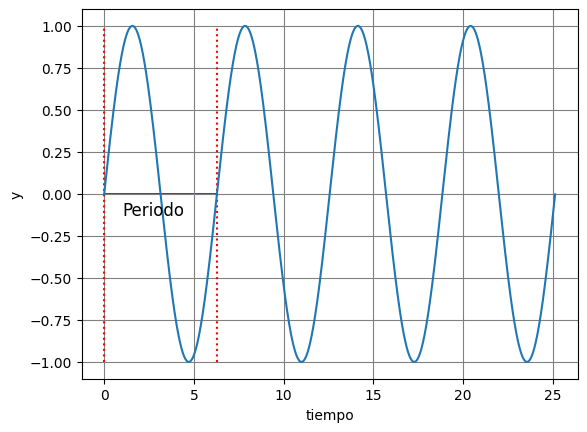

In [46]:
periodo = 8*pi

x = np.arange(0,periodo,0.01)
y = [modelo(1,1/(2*pi),0,tiempo)for tiempo in x]
plt.vlines(x=[0,6.3],ymin=-1.0,ymax=1,colors='red',linestyles='dotted',label='Periodo')
plt.arrow(x=0,y=0,dx=6.3,dy=0,color='red',shape='full',label='Periodo')
plt.text(1,-0.125,"Periodo",fontsize='large')
ploteo(x,y)

### Frecuencia de una función

La frecuencia se define como el número de veces que se repite la función por unidad de tiempo. Para verlo de una manera más clara, podemos ocupar la función senoidal como ejemplo para explicar esto de mejor manera.

También podemos ver a la frecuencia como el inverso del periodo:
- $f = \frac{1}{T}$ (en Hz)

- $\omega = \frac{1}{T}$ (en radianes)

Podemos decir que la frecuencia de una función senoidal es la medida del número de veces que podemos ver el patrón repetitivo en un cierto periodo o intervalo de tiempo. En nuestro ejemplo de arriba podemos ver que la frecuencia es de 1, porque solamente podemos ver un solo ciclo de la función seno en el periodo, pero en la gráfica de abajo podremos ver que como la frecuencia es de 2, tenemos dos ciclos de la función seno en el mismo periodo de tiempo.

En el siguiente bloque de código podremos jugar con el paramétro 'frecuencia' para poder ver de una manera más didáctica que es la frecuencia.
- Si nosotros cambiamos el valor del parametro 'frecuencia' que por defecto tiene un valor de 2, podremos ver como vemos más ciclos de la función seno por unidad de tiempo.

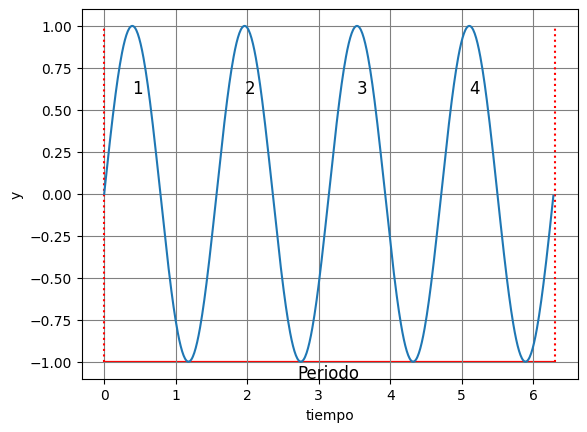

In [101]:
frecuencia = 4

x = np.arange(0,2*pi,0.01)
y = [modelo(1,frecuencia/(2*pi),0,tiempo)for tiempo in x]
plt.figure()
plt.vlines(x=[0,6.3],ymin=-1.0,ymax=1,colors='red',linestyles='dotted',label='Periodo')
plt.arrow(x=0,y=-1,dx=6.3,dy=0,color='red',shape='full',label='Periodo')
plt.text(2.7,-1.10,"Periodo",fontsize='large')
picos = signal.find_peaks(y)
for i in range(frecuencia):
    plt.text(x=((picos[0][i])/100),y=0.60,s=i+1,fontsize='large')
ploteo(x,y)


### Amplitud


La amplitud puede emplearse para nombrar al alargamiento, la distensión o el ensanchamiento de algo.
El concepto de amplitud de onda aparece en el terreno de la física y se vincula al valor más alto que registra una variable, midiéndose desde el punto medio o de equilibrio. En una señal electromagnética o en un movimiento ondulatorio, la amplitud de onda es la distancia que existe entre el valor máximo (el punto más alto de la onda) y el punto de equilibrio.

- A continuacion se muestra el codigo para poder graficar la amplitud de onda en Python donde si modificamos la amplitud se puede ver como las graficas se hacen mas grandes o mas chicas

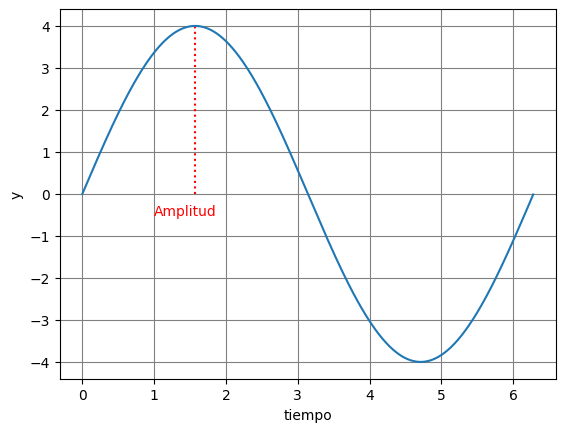

In [106]:
amplitud = 4   
x = np.arange(0,2*pi,0.01)
y = [modelo(amplitud,1/(2*pi),0,tiempo)for tiempo in x]
picos_amp = signal.find_peaks(y)
plt.vlines(x=((picos_amp[0][0])/100),ymin=0,ymax=amplitud,linestyles='dotted',color='red')
plt.text(x=1,y=-0.5,s='Amplitud',color='red')
ploteo(x,y)


### Fase


Fase es una medida de la diferencia de tiempo entre dos ondas senoidales. Aunque la fase es una diferencia verdadera de tiempo, siempre se mide en terminos de ángulo, en grados o radianes. Eso es una normalización del tiempo que requiere un ciclo de la onda sin considerar su verdadero periodo de tiempo.

La diferencia en fase entre dos formas de onda se llama a veces el desplazamiento de fase. Un desplazamiento de fase de 360 grados es un retraso de un ciclo o de un perìodo de la onda, lo que realmente no es ningún desplazamiento. Un desplazamiento de 90 grados es un desplazamiento de 1/4 del periodo de la onda etc. El desplazamiento de fase puede ser considerado positivo o negativo;eso quiere decir que una forma de onda puede ser retrasada relativa a otra o una forma de onda puede ser avanzada relativa a otra. Esos fenómenos se llaman atraso de fase y avance de fase respectivamente

La fase esta representada por la letra griega phi  $\phi$



- En la siguiente celda se puden hacer variaciones en la fase de una onda sinoidal

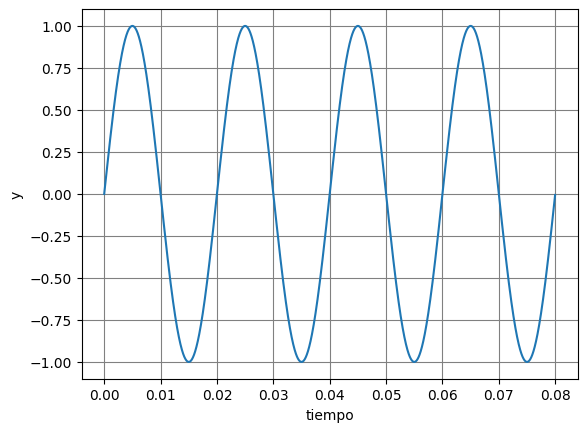

In [28]:
fase=0 

x = np.arange(0, 0.08, 1/50000)
y = 1*np.sin(2*np.pi*50*(np.arange(0.08 /(1/50000)))*1/50000 + fase*(np.pi/180))
ploteo(x,y)



### Longitud de Onda

La longitud de onda es unos de los parámetros que se utiliza para definir físicamente una onda. Este parámetro puede definirse para toda onda periódica, es decir, para el tipo de onda que se repite con exactamente la misma forma cada un intervalo de tiempo determinado.

En una onda periódica la longitud de onda es la distancia física entre dos puntos a partir de los cuales la onda se repite.

Esta definición puede verse claramente en la siguiente onda sinusoidal. En este caso la longitud de onda es la distancia entre dos crestas, entre dos valles o entre dos de los puntos en los que la onda tiene un valor igual a cero

Esta representada por la letra griega lambda $\lambda$. Su formula esta dada por:
 - $\lambda = \frac{v}{f}$

donde:
 - v: velocidad de transmisión de la onda
 - f: frecuencia 




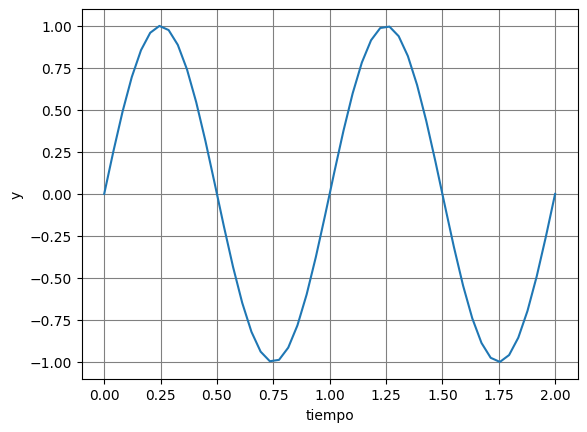

In [29]:

longitud=1.0      #longitud de onda

x=np.linspace(0.0,2,50) 
y = np.sin(2*np.pi*((x/longitud)))
ploteo(x,y)


### Señales compuestas

Una señal compuesta se define como aquella señal que se compone de señales más simples. Cualquier señal compuesta es realmente una combinación de señales senoidales con diferentes frecuencias, amplitudes y fases.

Si una señal compuesta es periódica entonces su descomposición nos dará como resultado:

- Una serie de señales con frecuencias discretas

Si una señal compuesta no es periódica entonces su descomposición nos dará como resultado:

- Una combinación de ondas senoidales con frecuencias continuas.

A continuación podemos ver una señal compuesta por las siguientes señales:

- $2sen(2 \pi t)$
- $sen(4 \pi 4t)$
- $3sen(3 \pi 2t)$

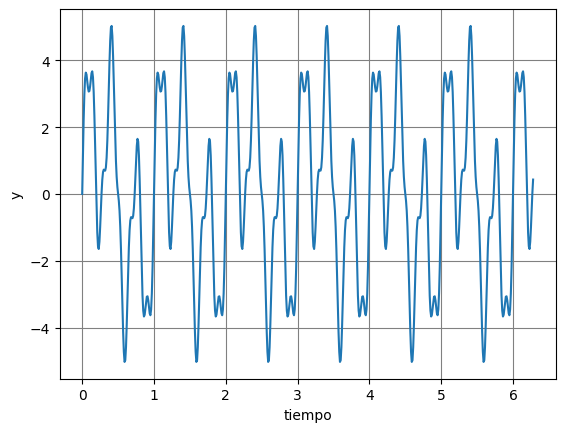

In [30]:
x = np.arange(0,2*pi,0.01)
signal_1 = 2*np.sin(2*np.pi*x)
signal_2 = 1*np.sin(4*np.pi*4*x)
signal_3 = 3*np.sin(3*np.pi*2*x)
composite_signal = signal_1+signal_2+signal_3
ploteo(x,composite_signal)

### Importancia de las señales compuestas

Una señal analógica comunmente está formada por múltiples ondas senoidales, y esto es porque una onda senoidal de frecuencia única no es útil para la transmisión de datos, ya que durante la transmisión de información, la señal viajará por un medio repleto de ruido (aire) y la información se verá comprometida.

Es por eso que para combatir el ruido y asegurar una transmisión exitosa de datos, se inventa la "Modulación". Principalmente consiste en varíar algún paramétro de la señal con el fin de obtener el mejor desempeño del canal de comunicación, lo cual nos asegura mayor cantidad de información transmitida con apenas interferencia del ruido.

La técnica más popular de modulación durante mucho tiempo fue la modulación en amplitud, es decír, AM (Amplitude modulation). Funciona mediante la variación de la amplitud de la señal transmitida en relación a la información envíada, esto es posible o se entiende mejor sabiendo que se usan dos señales.

- Señal de banda base: Contiene la información
- Señal portadora: Será manipulada para evitar la pérdida de información durante la transmisión

A la señal de banda base se le adicionará la señal portadora, formando una señal compuesta resistente al ruido, es como si la portadora fuera nuestro escudo en la transmisión a través del medio.

Una vez recibida la señal, se usará alguna técnica de demodulación para extraer la portadora y devolver la señal original al destinatario.

A continuación se mostrará el proceso de modulación en amplitud (dual side band con transmisión de portadora) de una señal para su transmisión.

Se puede jugar con la modulación modificando las frecuencias de las señales, por ejemplo, en el ejemplo siguiente trabajaremos con señales con componentes de 100,200 y 300 Hz de frecuencia, mismos valores que podemos modificar.

- g: Variable para ingresar la señal, podemos modificar sus parametros de acuerdo al modelo senoidal que vimos arriba, a pesar de tener una señal coseno, podríamos tener una señal seno perfectamente.
- c: Variable para ingresar la señal de la portadora, aquí podemos modificar la frecuencia de la portadora, que por defecto es de 1000 Hz


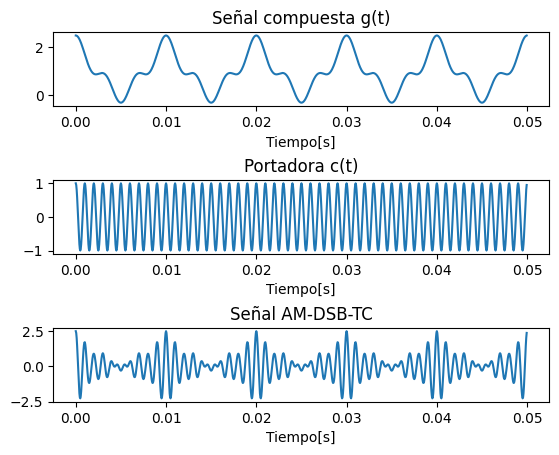

In [116]:
T = 0.00005  # Periodo de muestreo (seg)
fs = 1/T  # Frecuencia de muestreo (Hz)
N = 1000  # Numero de muestras
t = np.arange(0.0, N*T, T)  # N muestras para intervalo total
# N/2 muestras para intervalo de Nyquist (KHz)
f = np.arange(0.0, (N/2)*(fs/N)/1000, (fs/N)/1000)
# Offset:
A = 1.0
# Senal con componentes de 100, 200 y 300 Hz:
g = A+np.cos(2*np.pi*100*t)+0.1*np.cos(2*np.pi*200*t) + \
    0.4*np.cos(2*np.pi*300*t)  # %Senal
G = np.fft.fft(g)
c = np.cos(2*np.pi*1000*t)  # Portadora de 1KHz
C = np.fft.fft(c)
s = g*c  # Senal AM-DSB-TC
S = np.fft.fft(s)
fig1,axarr = plt.subplots(3,1)
axarr[0].plot(t,g)
axarr[0].set_title('Señal compuesta g(t)')
axarr[0].set_xlabel('Tiempo[s]')
axarr[1].plot(t,c)
axarr[1].set_title('Portadora c(t)')
axarr[1].set_xlabel('Tiempo[s]')
axarr[2].plot(t,s)
axarr[2].set_title('Señal AM-DSB-TC')
axarr[2].set_xlabel('Tiempo[s]')
fig1.subplots_adjust(hspace=1.0)
plt.show()


### Ancho de banda

Es la longitud de la extensión de frecuencias, medida en hercios (Hz), en la que se concentra la mayor potencia de la señal. Se puede calcular a partir de una señal temporal mediante el análisis de Fourier. Las frecuencias que se encuentran entre esos límites se denominan también frecuencias efectivas.

### Transformada de Fourier

Es una transformación matemática empleada para transformar señales entre el dominio del tiempo y el dominio de la frecuencia, que tiene muchas aplicaciones en la física y la ingeniería. El propio término se refiere tanto a la operación de transformación como a la función que produce

La transformada de Fourier se utiliza para pasar una señal al dominio de frecuencia para así obtener información que no es evidente en el dominio temporal. Por ejemplo, es más fácil saber sobre qué ancho de banda se concentra la energía de una señal analizándola en el dominio de la frecuencia.

### Espectro de la frecuencia 

El espectro de frecuencias es una representación gráfica de las ondas y su campo de aplicación en función de la frecuencia




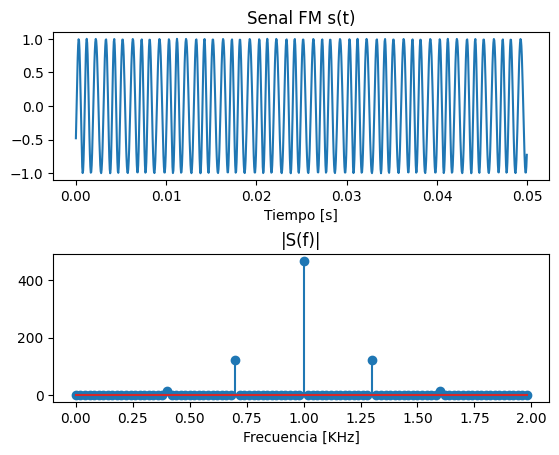

In [32]:
T = 0.00005; #Periodo de muestreo (seg)
fs = 1/T; #Frecuencia de muestreo (Hz)
N = 1000 #Numero de muestras
t = np.arange(0.0, N*T, T) #N muestras para intervalo total
f = np.arange(0.0, (N/2)*(fs/N)/1000, (fs/N)/1000) #N/2 muestras para intervalo de Nyquist (KHz)
g = np.sin(2*np.pi*300*t) #%Senal
G = np.fft.fft(g)
teta=np.imag(signal.hilbert(g))
A_c = 1.0 # Amplitud de la portadora
f_c = 1000 # frecuencia de la portadora
c = A_c*np.sin(2*np.pi*f_c*t) #Portadora
C = np.fft.fft(c)
B_fm= 0.5 # Indice de modulacion
s = np.sin(2*np.pi*f_c*t+B_fm*teta) #Senal FM
S = np.fft.fft(s)

fig1, axarr = plt.subplots(2, 1)
axarr[0].plot(t, s)
axarr[0].set_title('Senal FM s(t)')
axarr[0].set_xlabel('Tiempo [s]')
axarr[1].stem(f[0:100],abs(S[0:100]))
axarr[1].set_title('|S(f)|')
axarr[1].set_xlabel('Frecuencia [KHz]')
fig1.subplots_adjust(hspace=0.5)

plt.show()

### Fuentes bibliográficas

Jorge Isur Balderas Ramírez
- Comer, D. E. (2015). Computer Networks and Internets (6th Revised ed.). Pearson.